In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix, r2_score, classification_report
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('data.csv')
data

In [ ]:
X = pd.DataFrame(load_wine().data, columns=load_wine().feature_names)
y = load_wine().target
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
x_scalar = StandardScaler().fit_transform(X)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, random_state=42, test_size=0.3)

In [ ]:
model = LogisticRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
r2_score(y_test, y_pred)

0.9692657939669892

In [ ]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 20,  1],
       [ 0,  0, 14]], dtype=int64)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [ ]:
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 2,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

<Axes: >

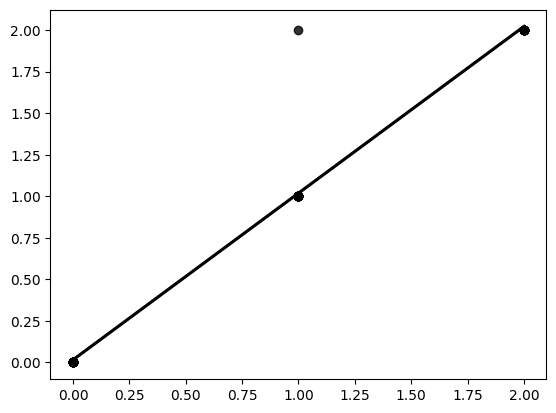

In [ ]:
sns.regplot(x=y_test, y=y_pred, ci=None, data=X, color='black')